# Problem Statement:

## Importing Necessary Dependencies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os,sys
import math

## Data.

In [2]:
books=pd.read_csv("Books.csv")
users=pd.read_csv("Users.csv")
ratings=pd.read_csv("Ratings.csv")

In [3]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [4]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [5]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


## Data Wrangling.

In [6]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [7]:
# we see that we have 271360 books, and 278858 users who did 1149780 ratings on the books.

In [8]:
# lets check for missing values in books dataset.
print(books.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [9]:
# we observe low missing values in the books data.

In [10]:
# lets check for missing values in users dataset.
print(users.isnull().sum())

User-ID          0
Location         0
Age         110762
dtype: int64


In [11]:
# we see that out of 278858 users 110762 users have their ages missing, which is around 40%.
# so 40% of the data missing.

In [12]:
# now fortunately for us the particualar method we are going to implement for the recommendation system
# does not require age.

In [13]:
# lets check for missing values in ratings dataset.
print(ratings.isnull().sum())

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [14]:
# we see no null values.

In [15]:
# moving ahead lets check for duplicates.

In [16]:
print(books.duplicated().sum())

0


In [17]:
print(users.duplicated().sum())

0


In [18]:
print(ratings.duplicated().sum())

0


In [19]:
# we see their are no dupliacte values in any of the datasets.

## Exploratory Data Analysis

In [20]:
# to perform EDA lets merge all the data
df=pd.merge(books,ratings,on="ISBN",how="outer")

In [21]:
df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1150984,0140260676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276670.0,8.0
1150985,0385258259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276670.0,7.0
1150986,0670849871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276670.0,8.0
1150987,15655122046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276670.0,6.0


In [22]:
print(df.isnull().sum())

ISBN                        0
Book-Title             118644
Book-Author            118645
Year-Of-Publication    118644
Publisher              118646
Image-URL-S            118644
Image-URL-M            118644
Image-URL-L            118648
User-ID                  1209
Book-Rating              1209
dtype: int64


In [23]:
# we see a lot of missing values now.

In [24]:
df=pd.merge(df,users,on="User-ID",how="outer")

In [25]:
df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8.0,0.0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8.0,0.0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8.0,0.0,"timmins, ontario, canada",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1324559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278853.0,NaN,"stranraer, n/a, united kingdom",17.0
1324560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278855.0,NaN,"tacoma, washington, united kingdom",50.0
1324561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278856.0,NaN,"brampton, ontario, canada",NaN
1324562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278857.0,NaN,"knoxville, tennessee, usa",NaN


In [26]:
print(df.isnull().sum())

ISBN                   173575
Book-Title             292219
Book-Author            292220
Year-Of-Publication    292219
Publisher              292221
Image-URL-S            292219
Image-URL-M            292219
Image-URL-L            292223
User-ID                  1209
Book-Rating            174784
Location                 1209
Age                    378287
dtype: int64


In [27]:
# we see missing values increase even further.

In [28]:
print(df.shape)

(1324564, 12)


In [29]:
df=df.dropna()

In [30]:
df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0,"stockton, california, usa",18.0
19,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0,"ottawa, ontario, canada",49.0
20,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,11400.0,9.0,"ottawa, ontario, canada",49.0
21,0151008116,Life of Pi,Yann Martel,2002,Harcourt,http://images.amazon.com/images/P/0151008116.0...,http://images.amazon.com/images/P/0151008116.0...,http://images.amazon.com/images/P/0151008116.0...,11400.0,6.0,"ottawa, ontario, canada",49.0
22,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,11400.0,0.0,"ottawa, ontario, canada",49.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1133824,8441407487,Sobre La Utilidad y Los Perjuicios de La Historia,Friedrich Wilhelm Nietzsche,2000,Edaf,http://images.amazon.com/images/P/8441407487.0...,http://images.amazon.com/images/P/8441407487.0...,http://images.amazon.com/images/P/8441407487.0...,246590.0,6.0,"madrid, madrid, spain",20.0
1133826,087004124X,Anthem,Ayn Rand,1966,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,259589.0,8.0,"venice, florida, usa",19.0
1133827,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,259591.0,8.0,"tioga, pennsylvania, usa",39.0
1133828,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981,Ediciones Fraile,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,259614.0,10.0,"madrid, madrid, spain",22.0


In [31]:
print(df.shape)

(753296, 12)


In [32]:
# now even after dropping all the missing values we get 7,53,296 remaining data out of 13,24,564 data.
# which is around 57% of the data that remains after dropping all the missing values.

In [33]:
print(df.dtypes)

ISBN                    object
Book-Title              object
Book-Author             object
Year-Of-Publication     object
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
User-ID                float64
Book-Rating            float64
Location                object
Age                    float64
dtype: object


In [34]:
# top 10 years with highest number of book publications.
print("Top 10 years with highest number of book publications:\n")
print(df["Year-Of-Publication"].value_counts().head(10))

Top 10 years with highest number of book publications:

2002    62628
2003    54593
2001    54101
1999    50433
2000    48595
1998    42781
1997    39729
1996    39466
1995    36105
1994    30950
Name: Year-Of-Publication, dtype: int64


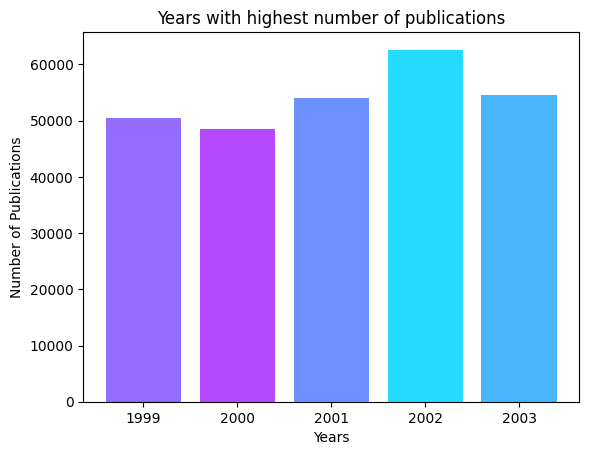

In [35]:
plt.bar(x=df["Year-Of-Publication"].value_counts().head().index,
        height=df["Year-Of-Publication"].value_counts().head(),
       color=sns.color_palette("cool"))
plt.title("Years with highest number of publications")
plt.xlabel("Years")
plt.ylabel("Number of Publications")
plt.show()

In [36]:
# lets check the top 10 books with highest number of ratings given by users.
print(df["Book-Title"].value_counts().head(10))

Wild Animus                                        2141
The Lovely Bones: A Novel                           920
The Da Vinci Code                                   708
Bridget Jones's Diary                               599
The Nanny Diaries: A Novel                          573
Angels &amp; Demons                                 552
The Secret Life of Bees                             547
A Painted House                                     517
Life of Pi                                          516
Divine Secrets of the Ya-Ya Sisterhood: A Novel     514
Name: Book-Title, dtype: int64


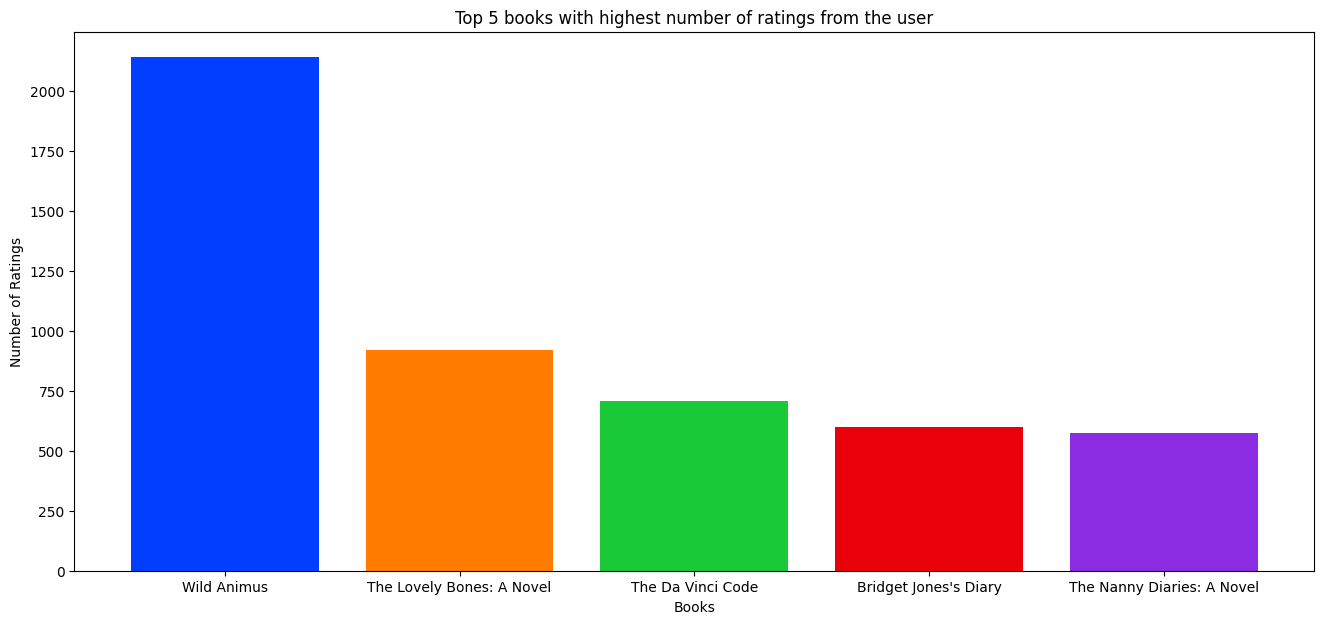

In [37]:
plt.figure(figsize=(16,7))
plt.bar(x=df["Book-Title"].value_counts().head(5).index,
        height=df["Book-Title"].value_counts().head(5),
       color=sns.color_palette("bright"))
plt.title("Top 5 books with highest number of ratings from the user")
plt.xlabel("Books")
plt.ylabel("Number of Ratings")
plt.show()

In [38]:
# lets check the top 10 authors with highest number of ratings to their books.
print("Top 10 authors with highest number of book ratings:\n")
print(df["Book-Author"].value_counts().head(10))

Top 10 authors with highest number of book ratings:

Stephen King          7664
Nora Roberts          6407
John Grisham          4168
James Patterson       4096
Mary Higgins Clark    3372
Dean R. Koontz        3256
Danielle Steel        2761
Tom Clancy            2753
Sue Grafton           2446
Anne Rice             2398
Name: Book-Author, dtype: int64


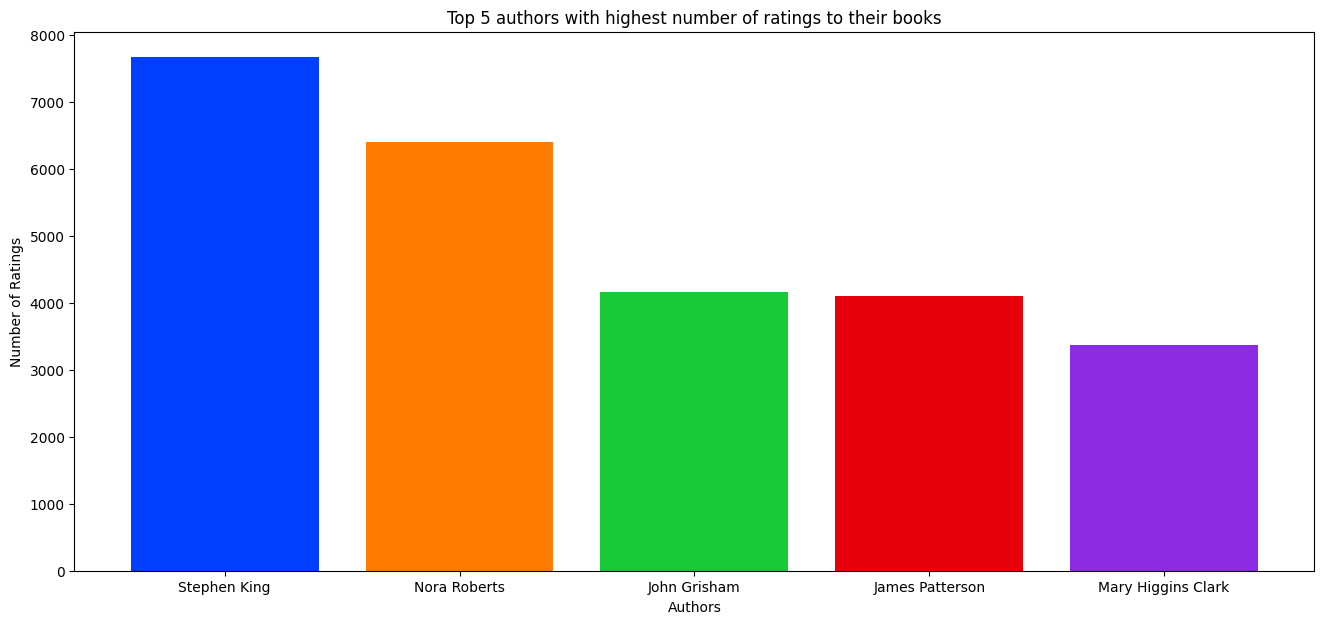

In [39]:
plt.figure(figsize=(16,7))
plt.bar(x=df["Book-Author"].value_counts().head().index,
        height=df["Book-Author"].value_counts().head(),
       color=sns.color_palette("bright"))
plt.title("Top 5 authors with highest number of ratings to their books")
plt.xlabel("Authors")
plt.ylabel("Number of Ratings")
plt.show()

In [40]:
# lets check the average rating of each book.
book_rat_mean=df.groupby("Book-Title").aggregate({"Book-Rating":lambda x: x.mean()})
book_rat_mean.rename(columns={"Book-Rating":"average_rating"},inplace=True)

In [41]:
book_rat_mean["average_rating"]=book_rat_mean["average_rating"].apply(lambda x: math.floor(x))

In [42]:
book_rat_mean.sort_values(by="average_rating",ascending=False)

,average_rating
Book-Title,
Foolproof Guide to Growing Roses,10
The Deadhead's Taping Compendium Volume II,10
Discovering Dinosaurs in the Old West: The Field Journals of Arthur Lakes,10
Bouquiner: Autobiobibliographie,10
"Thoughts to Share With a Wonderful Son: A Collection from Blue Mountain Arts (\the Language of ...\"" Series)""",10
...,...
Platinum Logic,0
Platinum Edition Using Microsoft Office 2000 (Using ... (Que)),0
Platinum Age B S,0


In [43]:
# so these are the books whose average rating is 10
average_10=book_rat_mean[book_rat_mean["average_rating"]==10]
average_10

,average_rating
Book-Title,
Dark Justice,10
'California Historical Landmarks',10
"'Isms: a dictionary of words ending in -ism, -ology, and -phobia,: With some similar terms, arranged in subject order",10
'Round the Corner (Sister Circle),10
"1,000 Makers of the Millennium: The Men and Women Who Have Shaped the Last 1,000 Years",10
...,...
de Profundis,10
fom winde ferfeelt ( vom winde verfehlt). welt-strolch macht links-shreibreform.,10
fÃ?Â¼nfter sein,10


In [44]:
# these are the books whose average rating is 9
average_9=book_rat_mean[book_rat_mean["average_rating"]==9]
average_9

,average_rating
Book-Title,
Microsoft Application Architecture For Microsoft .net: Designing Application (Pro-Other),9
"' Sie belieben wohl zu scherzen, Mr. Feynman.'. Abenteuer eines neugierigen Physikers.",9
... steigen aus... maschine brennt... 10 Fliegergeschichten.,9
"1,000 Years, 1,000 People: Ranking the Men and Women Who Shaped the Millennium",9
"1,911 Best Things Anybody Ever Said",9
...,...
dtv - Atlas Weltgeschichte 2. Von der FranzÃ?Â¶sischen Revolution bis zur Gegenwart.,9
"eBay the Smart Way: Selling, Buying, and Profiting on the Web's #1 Auction Site, Second Edition",9
sharks (reading discovery),9


In [45]:
# these are the books whose average rating is 8
average_8=book_rat_mean[book_rat_mean["average_rating"]==8]
average_8

,average_rating
Book-Title,
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8
the Devil Will Drag You Under,8
$30 Film School,8
"'Mit Verlaub, Sie sind ein Arschloch.' Joschkas schÃ?Â¤rfste SprÃ?Â¼che.",8
'Webster's New Business Writer's Guide (Webster's Dictionary Series),8
...,...
thepurplebook: The Definitive Guide to Exceptional Online Shopping,8
Ã?ber den physiologischen Stumpfsinn des Mannes (Kultur-Kuriosa),8
Ã?Â?ber den ProzeÃ?Â? der Zivilisation 1.,8


In [46]:
# these are the books whose average rating is 7
average_7=book_rat_mean[book_rat_mean["average_rating"]==7]
average_7

,average_rating
Book-Title,
Highland Desire (Zebra Splendor Historical Romances),7
Nonbook Materials: The Organization of Integrated Collections,7
"Summonings: Books of Magic, Vol. 2",7
08/15 Heute,7
"1,000 beautiful house plants and how to grow them",7
...,...
Â¿QuiÃ©n se ha llevado mi queso?,7
Ã?Â?. Kolumnen.,7
Ã?Â?ber die Freiheit.,7


In [47]:
# these are the books whose average rating is 6
average_6=book_rat_mean[book_rat_mean["average_rating"]==6]
average_6

,average_rating
Book-Title,
' Sehr geehrtes Arschloch.' Briefe an den RegierungsprÃ?Â¤sidenten.,6
'N Sync,6
".Hack: //Legend of the Twilight, Vol. 1",6
".Hack: //Legend of the Twilight, Vol. 2",6
"1,003 Great Things About Kids",6
...,...
"\Reader's Digest\"" Complete Guide to Drawing and Painting""",6
"\You'll Never Nanny in This Town Again!\"": The Adventures and Misadventures of a Hollywood Nanny""",6
de Amor y de Sombra - Bolsillo,6


In [48]:
# these are the books whose average rating is 5
average_5=book_rat_mean[book_rat_mean["average_rating"]==5]
average_5

,average_rating
Book-Title,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",5
Final Fantasy Anthology: Official Strategy Guide (Brady Games),5
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),5
"The Secret of the Old Clock (Nancy Drew, Book 1)",5
Travel Companion Chile and Easter Island (Travel Companion),5
...,...
"de Acuerdo, Jeeves",5
dirty linen,5
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),5


In [49]:
# these are the books whose average rating is 4
average_4=book_rat_mean[book_rat_mean["average_rating"]==4]
average_4

,average_rating
Book-Title,
Flight of Fancy: American Heiresses (Zebra Ballad Romance),4
God's Little Promise Book,4
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",4
!Arriba! Comunicacion y cultura,4
' Small g'. Eine Sommeridylle.,4
...,...
sed &amp; awk (A Nutshell handbook),4
stardust,4
why I'm like this : True Stories,4


In [50]:
# these are the books whose average rating is 3
average_3=book_rat_mean[book_rat_mean["average_rating"]==3]
average_3

,average_rating
Book-Title,
Garfield Bigger and Better (Garfield (Numbered Paperback)),3
'Salem's Lot,3
"'Tis The Season (Harlequin Historical Series, No. 583)",3
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,3
1+1+1 Une RÃ?Â©volution,3
...,...
ha-Sipur Â°al ha-Â°Ir ha-Adumah,3
it was today,3
"Â¿QuÃ© me quieres, amor?",3


In [51]:
# these are the books whose average rating is 2
average_3=book_rat_mean[book_rat_mean["average_rating"]==3]
average_3

,average_rating
Book-Title,
Garfield Bigger and Better (Garfield (Numbered Paperback)),3
'Salem's Lot,3
"'Tis The Season (Harlequin Historical Series, No. 583)",3
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,3
1+1+1 Une RÃ?Â©volution,3
...,...
ha-Sipur Â°al ha-Â°Ir ha-Adumah,3
it was today,3
"Â¿QuÃ© me quieres, amor?",3


In [52]:
# these are the books whose average rating is 1
average_1=book_rat_mean[book_rat_mean["average_rating"]==1]
average_1

,average_rating
Book-Title,
"Goosebumps Monster Edition 1: Welcome to Dead House, Stay Out of the Basement, and Say Cheese and Die!",1
"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",1
"Q-Zone (Star Trek The Next Generation, Book 48)",1
$14 In The Bank (Cathy Collection),1
'A Hell of a Place to Lose a Cow': An American Hitchhiking Odyssey,1
...,...
eXistenZ: A Novelization,1
liegen lernen. Roman zum Film.,1
operation : mistletoe (the special agents),1


In [53]:
# these are the books whose average rating is 0
average_0=book_rat_mean[book_rat_mean["average_rating"]==0]
average_0

,average_rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",0
Always Have Popsicles,0
Apple Magic (The Collector's series),0
Deceived,0
Harry Potter and the Bible: The Menace Behind the Magick (And the Bible Series),0
...,...
"Ã?Â?berall, nur nicht hier",0
Ã?Â?bermorgen.,0
Ã?Â?berraschung am Valentinstag.,0


## Popularity based Recommender System.

In [54]:
# popularity based recommender system works upon some formula defined by the respective creator of the
# system to find and display the top most product.

In [55]:
# here in our case we are going to use the average rating of the books to recommend and display the top
# rated books.

In [56]:
# however if we think about it there is a slight problem that is, if there very low number of books
# then their popularity will be defined based upon these, hence we set a criteria that we would only
# consider average ratings of the books with atleast 250 ratings.

In [57]:
book_rat=ratings.merge(books,on="ISBN")

In [58]:
book_rat

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [59]:
num_rat=book_rat.groupby("Book-Title").aggregate({"ISBN":lambda x: x.count()})
num_rat.rename(columns={"ISBN":"num_of_ratings"},inplace=True)
num_rat.reset_index(inplace=True)

In [60]:
num_rat

,Book-Title,num_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [61]:
avg_rat=book_rat.groupby("Book-Title").aggregate({"Book-Rating":lambda x: x.mean()})
avg_rat.rename(columns={"Book-Rating":"average_rating"},inplace=True)
avg_rat.reset_index(inplace=True)

In [62]:
avg_rat

,Book-Title,average_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [63]:
# now lets num_rat and avg_rat datasets.
popular=num_rat.merge(avg_rat,on="Book-Title")

In [64]:
popular

,Book-Title,num_of_ratings,average_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [65]:
# we want only those books with number of ratings more than or equal to 250.
popularity=popular[popular["num_of_ratings"]>=250]

In [66]:
popularity

,Book-Title,num_of_ratings,average_rating
764,1984,284,4.454225
818,1st to Die: A Novel,509,3.575639
1048,2nd Chance,356,3.269663
1760,A Bend in the Road,346,3.364162
2281,"A Child Called \It\"": One Child's Courage to S...",265,4.086792
...,...,...,...
233850,White Oleander : A Novel,387,3.506460
233851,White Oleander : A Novel (Oprah's Book Club),356,3.772472
234740,Wicked: The Life and Times of the Wicked Witch...,326,3.766871
234951,Wild Animus,2502,1.019584


In [67]:
# now lets get the top 50 values
top_50=popularity.sort_values("average_rating",ascending=False).head(50)

In [68]:
top_50

,Book-Title,num_of_ratings,average_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [69]:
# now we want author name, image and other details also of the book.
top_50.merge(books,on="Book-Title",how="left")

,Book-Title,num_of_ratings,average_rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136369,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0786222743,J. K. Rowling,2000,Thorndike Press,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
4,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139600,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...
...,...,...,...,...,...,...,...,...,...,...
191,Lord of the Flies,259,3.818533,0698102193,William G. Golding,1978,Putnam Pub Group,http://images.amazon.com/images/P/0698102193.0...,http://images.amazon.com/images/P/0698102193.0...,http://images.amazon.com/images/P/0698102193.0...
192,A Prayer for Owen Meany,413,3.796610,0345361792,John Irving,1990,Ballantine Books,http://images.amazon.com/images/P/0345361792.0...,http://images.amazon.com/images/P/0345361792.0...,http://images.amazon.com/images/P/0345361792.0...
193,A Prayer for Owen Meany,413,3.796610,0345363523,John Irving,1989,Ballantine Books,http://images.amazon.com/images/P/0345363523.0...,http://images.amazon.com/images/P/0345363523.0...,http://images.amazon.com/images/P/0345363523.0...
194,"The Vampire Lestat (Vampire Chronicles, Book II)",301,3.777409,0345313860,ANNE RICE,1986,Ballantine Books,http://images.amazon.com/images/P/0345313860.0...,http://images.amazon.com/images/P/0345313860.0...,http://images.amazon.com/images/P/0345313860.0...


In [70]:
# we see duplicates as well so...
top_50=top_50.merge(books,on="Book-Title",how="left").drop_duplicates("Book-Title")

In [71]:
# setting index
top_50.index=range(len(top_50))

In [72]:
top_50=top_50[["Book-Title","Book-Author","num_of_ratings","Image-URL-M","average_rating"]]

In [73]:
top_50

,Book-Title,Book-Author,num_of_ratings,Image-URL-M,average_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,428,http://images.amazon.com/images/P/0439136350.0...,5.852804
1,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,387,http://images.amazon.com/images/P/0439139597.0...,5.824289
2,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,278,http://images.amazon.com/images/P/0590353403.0...,5.737410
3,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,347,http://images.amazon.com/images/P/043935806X.0...,5.501441
4,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,556,http://images.amazon.com/images/P/0439064872.0...,5.183453
5,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,281,http://images.amazon.com/images/P/0345339681.0...,5.007117
6,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,368,http://images.amazon.com/images/P/0345339703.0...,4.948370
7,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,575,http://images.amazon.com/images/P/059035342X.0...,4.895652
8,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,260,http://images.amazon.com/images/P/0345339711.0...,4.880769
9,To Kill a Mockingbird,Harper Lee,510,http://images.amazon.com/images/P/0446310786.0...,4.700000


In [74]:
# this is our small popularity based recommender system.

## Collaborative Filtering Based Recommender System.

In [75]:
# now we are going to create a collaborative filtering based recommender system, so the way this type
# of recommender system works is by considering the ratings of all users and consolidating all of them
# in a vector that corresponds to each of the book then using distance metrics it can be calculated
# the books closest to a particular book and hence those books can be recommended.

In [76]:
# so here we create a dataset where the rows should correspond to books and columns should correspond
# to each users rating.

In [77]:
# then moving ahead we are going to consider the ratings of those users only who have rated more than
# 200 books so as to consider the choices of users who are frequent and expirienced readers we are also
# going to consider only those books with number of ratings less than or equal to 50 so as to take only
# those books that are rated by a significant number of users.

In [78]:
# so lets go ahead with it...

In [79]:
# firstly lets filter the users out to only those who rated more than or equal to 200 books.
user_rat_num=book_rat.groupby("User-ID").aggregate({"ISBN": lambda x: x.count()})
user_rat_num.rename(columns={"ISBN":"num_of_ratings"},inplace=True)
user_200=user_rat_num[user_rat_num["num_of_ratings"]>200]
user_200.reset_index(inplace=True)

In [80]:
user_200

,User-ID,num_of_ratings
0,254,300
1,2276,456
2,2766,269
3,2977,227
4,3363,890
...,...,...
806,274308,1293
807,275970,1325
808,277427,490
809,277639,265


In [81]:
# now lets get the data of these users only
filtered_ratings=book_rat[book_rat["User-ID"].isin(user_200["User-ID"])]

In [82]:
filtered_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


In [83]:
# this is the data of users who did 200+ ratings.

In [84]:
# now lets filter those books only that have recieved more than 50 ratings.
book_rat_num=filtered_ratings.groupby("Book-Title").aggregate({"ISBN":lambda x: x.count()})
book_rat_num.rename(columns={"ISBN":"num_of_ratings"},inplace=True)
book_50=book_rat_num[book_rat_num["num_of_ratings"]>=50]
book_50.reset_index(inplace=True)

In [85]:
book_50

,Book-Title,num_of_ratings
0,1984,70
1,1st to Die: A Novel,160
2,2nd Chance,122
3,4 Blondes,70
4,A Bend in the Road,114
...,...,...
701,Year of Wonders,57
702,You Belong To Me,55
703,Zen and the Art of Motorcycle Maintenance: An ...,62
704,Zoya,59


In [86]:
# now lets get the data of these books only
final_ratings=filtered_ratings[filtered_ratings["Book-Title"].isin(book_50["Book-Title"])]

In [87]:
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [88]:
# so this is our final data for our collaborative filtering recommender system

In [89]:
# now lets create the data where our columns contain ratings from the users and rows contains books.
pt=final_ratings.pivot_table(index="Book-Title",columns="User-ID",values="Book-Rating")
# filling null values
pt.fillna(0,inplace=True)

In [90]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# so here we get 706*810 data where we have 706 books as across rows books are present while we have
# 810 users as across columns user ratings are present.
# hence here we can imagine it as a single book has its own vector of 810 elements and can be
# represented in a 810 dimensional hyperplane and to recommend similar books to the user we can
# measure the books with the highest cosine similarity to that particular book, here we are considering
# cosine similarity to find the similar books because even if the two similar data objects are far
# apart by the Euclidean distance, they could still have a smaller angle between them and Smaller the
# angle, higher the similarity.
# hence we use the concept of cosine similarity here to calculate similar books to recommend to the user.

In [92]:
from sklearn.metrics.pairwise import cosine_similarity

In [93]:
similarity=cosine_similarity(pt)

In [94]:
print(similarity.shape)

(706, 706)


In [95]:
# here we get an array of shape 706*706 denoting the simialrity scores of each book with each of the
# other books.

In [96]:
# such as here the first vector denotes the simialrity scores of the first book with every other book
print(similarity[0])
print()
print(similarity[0].shape)

[1.         0.10255025 0.01220856 0.         0.05367224 0.02774901
 0.08216491 0.13732869 0.03261686 0.03667591 0.02322418 0.06766487
 0.02083978 0.09673735 0.13388865 0.08303112 0.11153543 0.05100411
 0.02517784 0.11706383 0.         0.14333793 0.07847534 0.06150451
 0.08723968 0.         0.07009814 0.13658681 0.07600328 0.12167134
 0.00768046 0.01473221 0.         0.07965814 0.04522617 0.01556271
 0.09495938 0.0182307  0.02610465 0.07984012 0.11679969 0.0569124
 0.08354155 0.08471898 0.08785938 0.05491435 0.0548505  0.27026514
 0.09779123 0.06016046 0.08958835 0.06748675 0.         0.04468098
 0.01920872 0.         0.05629067 0.00557964 0.07877059 0.05219479
 0.18908177 0.         0.01240656 0.02984572 0.04279502 0.12680125
 0.16566735 0.         0.13357242 0.06615478 0.         0.
 0.         0.10968075 0.02806606 0.04521795 0.02613277 0.06876131
 0.01331627 0.10519138 0.03349457 0.01363458 0.23669374 0.
 0.10397941 0.06167753 0.14176273 0.11661083 0.08331012 0.00850895
 0.06715433 

In [97]:
# now we got the similarity scores so moving ahead we need a function that is gonna help us in finding
# out the books with highest similarity scores and recommend them to the users, this function is also
# gonna help us when creating a web app where we put our recommendation system.

In [98]:
def recommend(book_name):
    try:
        # finding the index number of the given book
        index=np.where(pt.index==book_name)[0][0]

        # finding the distances of all other books to the given book
        distances=similarity[index]

        # similar books
        similar_books=sorted(list(enumerate(distances)),key=lambda x: x[1],reverse=True)[1:6]

        # recommendations
        for i in  similar_books:
            print(pt.index[i[0]])
    except Exception as exp:
        print("Book was either not present in database or\nplease check the spelling or case of the specified book")

In [99]:
# lets check the function

In [100]:
recommend('The Notebook')

A Walk to Remember
The Rescue
One Door Away from Heaven
Toxin
The Five People You Meet in Heaven


In [101]:
recommend('1984')

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


In [102]:
recommend('The Da Vinci Code')

Angels &amp; Demons
Touching Evil
Saving Faith
The Sweet Potato Queens' Book of Love
Middlesex: A Novel


In [103]:
recommend('Fault In Our Stars')

Book was either not present in database or
please check the spelling or case of the specified book


In [104]:
# now lets export the appropriate data and the function to create a web api.
top_50.to_csv("app/top_50.csv")
final_ratings.to_csv("app/pages/app_data.csv")